# ANALYSIS OF FUNDING FOR INDIAN STARTUP ECOSYSTEM

### *Overview*
Welcome to the analysis of the Indian startup ecosystem funding data from 2018 to 2021. In this repository, you will find datasets containing details about startups, the funding amounts they received, and information about the investors involved. The objective is to provide a comprehensive understanding of the funding landscape in the Indian startup ecosystem during the specified years.

### *Objectives*
Funding Landscape Exploration: Investigate and understand the funding patterns, trends, and distributions within the Indian startup ecosystem for the specified years.

Sector-wise Analysis: Analyze funding trends across different industry sectors to identify key areas of investment and growth.

Investor Insights: Examine the involvement of investors, both in terms of frequency and amount, to identify influential backers in the startup ecosystem.

Startup Profiling: Profile startups based on their founding years, sectors, and funding stages to gain a holistic view of the evolving entrepreneurial landscape.

Recommendations: Formulate actionable recommendations based on the analysis, guiding the team's strategic approach and potential opportunities within the Indian startup ecosystem.


### *Hypothesis*

Ho (Null Hypothesis): The dominance of the Finance sector significantly influences the overall funding trends across various sectors.

Ha (Alternate Hypothesis): The Finance sector does not have a substantial impact on the overall funding trends across various sectors.

Ho (Null Hypothesis): Sectors established within the last decade exert a substantial influence on funding preferences among investors.

Ha (Alternate Hypothesis): The establishment date of sectors within the last 10 years does not significantly contribute to dominating funding patterns by investors.


### *Questions* 

1. What is the relationship between Funding and the year Founded?
2. Which year has the highest amount of investment?
3. What are the top 10 regions with the most startups?
4. What are the top 10 sectos that received the highest amount of funding collectively?
5. Which Region received the most investment?
6. What is the comparison of startups in Bangalore and Mumbai across different years?
7. How has the total investment amount changed over the years?
8. What is the assessment of funding trends across the years for the top 5 sectors?
9. How are Investor Counts Distributed Across Mapped Sectors?


## Data  Understanding
### *Data Quality Crisis*
- Missing values
- Undisclosed information
- Duplicate values
- Swapped data between columns

## Connecting to the Database
*Import required libraries*

In [80]:
import pyodbc
from dotenv import dotenv_values  #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings
import io
import requests

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')


*Create a connection by accessing your connection string with your defined environment variables*

In [81]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [82]:
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [83]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [84]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

In [85]:
# Sql query to receive data from the table LP1_startup_funding2020
query_2020 = "SELECT * FROM dbo.LP1_startup_funding2020"

# Sql query to receive data from the table LP1_startup_funding2021
query_2021 = "SELECT * FROM dbo.LP1_startup_funding2021"

#Execute the SQL queries and load the results into Pandas DataFrames
data_2020 = pd.read_sql(query_2020, connection)

data_2021 = pd.read_sql(query_2021, connection)


In [86]:
# Display the first five rows of 2020
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [87]:
# Display the first five rows of 2021
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [88]:
# Connectig to the 2019 CSV file
data_2019 = pd.read_csv('data/startup_funding2019.csv')

# Display the first five rows of 2019
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [89]:
# Fetching 2018 data
url = "https://raw.github.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/master/startup_funding2018.csv"
download = requests.get(url).content
 
 
data_2018 = pd.read_csv(io.StringIO(download.decode('utf-8')))
 
 
# Display the first five rows of 2018
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


## Data Cleaning

#### *Cleaning 2020*

In [90]:
# Assigining a DataFrame
df_2020 = data_2020

# Display the first 5 rows
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


Visualization for the missing data before cleaning

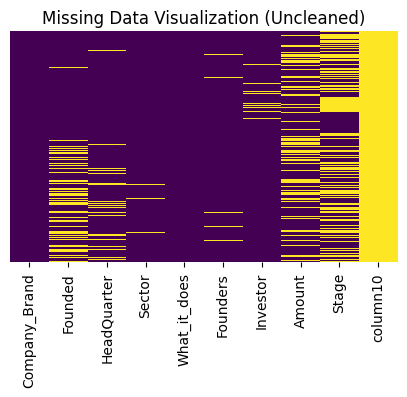

Missing Values Summary:
 Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64


In [91]:
# Check for missing values
missing_values  = df_2020.isnull().sum()

# Visualise missing data
plt.figure(figsize=(5, 3))
sns.heatmap(df_2020.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization (Uncleaned)')
plt.show()

# Display missing values summary
print('Missing Values Summary:\n', missing_values)

In [92]:
# Dropping column 10
df_2020 = df_2020.drop('column10', axis=1)

In [93]:
df_2020.shape

(1055, 9)

In [94]:
df_2020_to_concat = df_2020

Fetch Undisclosed

In [95]:
def fetch_undisclosed_rows(df):
    # Assuming 'Amount' is the column containing values
    column_name = 'Amount'

    # Convert the column to string and fetch rows where 'Amount' is 'Undisclosed' or 'undisclosed'
    undisclosed_rows = df[df[column_name].astype(str).str.lower() == 'undisclosed']
    return undisclosed_rows

# Example usage:
# Use the fetch_undisclosed_rows function on the 'df_2020' DataFrame
undisclosed_rows2020 = fetch_undisclosed_rows(df_2020)

# Display the fetched rows
undisclosed_rows2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage


Dealing with 'Undisclosed' and/ or 'undisclosed' values in 2020

- We delete. This is because the information for amount was not given but it does not mean the company was not funded
- Therefore, we cannot assign it NaN, N/A or 0 values

In [96]:
# Convert 'Amount' column to string and delete rowa where 'Amount' is 'Undisclosed' or 'undisclosed'
df_2020 = df_2020[(df_2020['Amount'].astype(str).str.lower() != 'undiscloded') & (df_2020['Amount'] !='Undisclosed')]

# Display the DataFrame after deleting the rows
print("Any rows whose Amounts column has values 'Undisclosed' and/ or 'undisclosed' has been deleted!")

Any rows whose Amounts column has values 'Undisclosed' and/ or 'undisclosed' has been deleted!


In [97]:
# Showing the datatype
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
dtypes: float64(2), object(7)
memory usage: 74.3+ KB


In [98]:
# Checking the frequency count of missing values
df_2020.apply(lambda X:sum(X.isnull()))

Company_Brand      0
Founded          213
HeadQuarter       94
Sector            13
What_it_does       0
Founders          12
Investor          38
Amount           254
Stage            464
dtype: int64

In [99]:
def swap_non_numeric_with_numeric(df):
    amounts_column = 'Amount'
    stage_column = 'Stage'
    investor_column = 'Investor'

 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Function to find numeric values in 'Stage' column
    def find_numeric_values():
        numeric_dict = {}
        for index, value in df[stage_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values()
 
    # Find numeric values in 'Stage' column
    numeric_values = find_numeric_values()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Stage'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Stage' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, stage_column] = non_numeric_values[index]
 
    # Function to find numeric values in 'Investor' column
    def find_numeric_values_founders():
        numeric_dict = {}
        for index, value in df[investor_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values_founders():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values_founders()
 
    # Find numeric values in 'Founders' column
    numeric_values = find_numeric_values_founders()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Founders'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Founders' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, investor_column] = non_numeric_values[index]
 
    return df
 
 
def strip_dollar_and_comma(df):
    # Assuming column names are 'Amounts' and 'Stage'
    numeric_columns = ['Investor', 'Amount', 'Stage']
 
    # Iterate through numeric columns and strip dollar sign ($) and comma (,)
    for column in numeric_columns:
        df[column] = df[column].replace('[\$]', '', regex=True)
 
    return df
 
 
def replace_non_numeric_with_zero(df):
    # Assuming column name is 'Amounts'
    amounts_column = 'Amount'
    # Replace non-numeric values in 'Amounts' column with 0
    df[amounts_column] = pd.to_numeric(df[amounts_column], errors='coerce').fillna(0).astype(int)
 
    return df


def fill_null_values(df):
    # Specify the columns to fill with 'N/A'
    columns_to_fill_na = ['HeadQuarter', 'Investor', 'Stage','Sector']
 
    # Fill null values in specified columns with 'N/A'
    df[columns_to_fill_na] = df[columns_to_fill_na].fillna('N/A')

    # Fill null values in 'Founded' with 0   
    df['Founded'] = df['Founded'].fillna(0)

    # Convert 'Founded' values to integers    
    df['Founded'] = df['Founded'].astype(int)
 
    return df


  
 
# Example usage
#data = {'Founders': ['$1,200', '$1,300,000', '', 'D', 'E', 'F', '', 'H', 'J', 'K'],
       # 'Amounts': ['A', 'Undisclosed', '$4,000', '$5,000', 'undisclosed', '$7,000,000', 'Seed', '$4,000', 'series A', '$5,000'],
       # 'Stage': ['Upsparks', 'Series C', 'series c', 'seed', 'seed', 'seed', '$2,000', 'seed', '$3,000', 'series A']}
df = pd.DataFrame(df_2020)
 
# Display the DataFrame before processing
#print("DataFrame before processing:")
#print(df)
#info = df.info()
#print("\n Info before processing")
#print(info)
 
# Call the function to replace NaN values in 'Founders' with "N/A"
df['Founders'] = df['Founders'].fillna('N/A')
 
# Call the function to strip dollar sign and comma from numeric values
df = strip_dollar_and_comma(df)
 
# Display the DataFrame after stripping dollar sign and comma
#print("\nDataFrame after stripping dollar sign and comma:")
#print(df)
 
# Call the function to swap non-numeric with numeric values
df = swap_non_numeric_with_numeric(df)
 
# Display the DataFrame after swapping Numerical values in Stage with non-numericals in amounts
#print("\nDataFrame after swapping numeric in 'Stage' with non-numeric values in 'Amount':")
#print(df)
 
# Call the function to swap numeric with non-numeric values in 'Founders'
df = swap_non_numeric_with_numeric(df)
 
# Display the DataFrame after swapping numeric with non-numeric values in 'Founders'
#print("\nDataFrame after swapping numeric in 'Founders' with non-numeric values in 'Amount':")
#print(df)
# Call the function to fill null values with 'N/A'
df = fill_null_values(df)
 # Display the DataFrame after filling null values
#print("\nDataFrame after filling null values with 'N/A':")

#print(df)
# Call the function to replace non-numeric values in 'Amounts' with 0
df = replace_non_numeric_with_zero(df)

# Call the function to fill null values in  'Founded' with 0
df = fill_null_values(df) 
# Display the DataFrame after filling null values
#print("\nDataFrame after filling null values with 'N/A' and 'Founded' with 0:")
#print(df)

info = df.info()
 
# Display the DataFrame after replacing non-numeric values with 0
#My amounts column should have all numerics
#print("\nDataFrame after replacing non-numeric values with 0 :")
print("\nDataFrame after processing:")
cleandata_2020=df
cleandata_2020.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  1055 non-null   object
 1   Founded        1055 non-null   int32 
 2   HeadQuarter    1055 non-null   object
 3   Sector         1055 non-null   object
 4   What_it_does   1055 non-null   object
 5   Founders       1055 non-null   object
 6   Investor       1055 non-null   object
 7   Amount         1055 non-null   int32 
 8   Stage          1055 non-null   object
dtypes: int32(2), object(7)
memory usage: 66.1+ KB

DataFrame after processing:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,N/A
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,0,Pre-seed
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,N/A
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,N/A
5,qZense,2019,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000,Seed
6,MyClassboard,2008,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000,Pre-series A
7,Metvy,2018,Gurgaon,Networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,0,Pre-series
8,Rupeek,2015,Bangalore,FinTech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000,Series C
9,Gig India,2017,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000,Pre-series A


Visualisation for 2020 data after cleaning

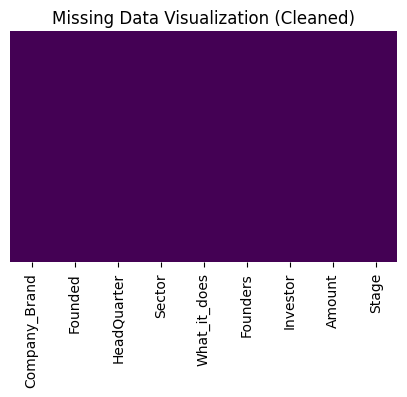

Missing Vslues Summary:
 Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64


In [100]:
# Check for missing values 
missing_values = cleandata_2020.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5,3))
sns.heatmap(cleandata_2020.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization (Cleaned)')
plt.show()

# Display missing values summary
print('Missing Vslues Summary:\n', missing_values)

### *Cleaning 2021*

In [101]:
# Assigining a DataFrame
df_2021 = data_2021

# Display the first 5 rows
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [102]:
df_2021.shape

(1209, 9)

In [103]:
df_2021_to_concat = df_2021

Visualization for 2021 data before cleaning

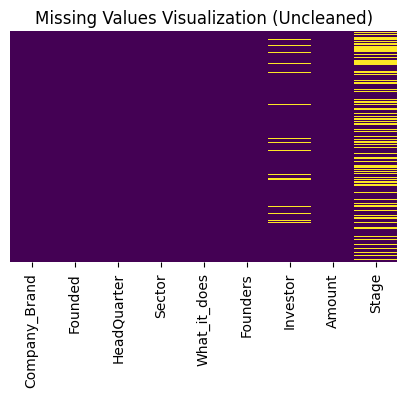

Missing Values Sammary:
 Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64


In [104]:
# Check for missing values
missing_values = df_2021.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5,3))
sns.heatmap(df_2021.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Visualization (Uncleaned)')
plt.show()

# Display missing values summary
print('Missing Values Sammary:\n', missing_values)

In [105]:
# Change the None, NaN to 0
df_2021['Founded'] = df_2021['Founded'].fillna(0)

# Convert the founded from float to integer
df_2021['Founded'] = df_2021['Founded'].astype('int')

df_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [106]:
# Filling the None, NaN values with N/A from the HQ column
df_2021['HeadQuarter'] = df_2021['HeadQuarter'] .fillna("N/A")
df_2021


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [107]:
undisclosed_rows = df_2021[df_2021['Amount'] == 'Undisclosed']
 
# Check if there are any rows with 'undisclosed' in the 'Amount' column
if not undisclosed_rows.empty:
    # Display the rows where 'Amount' is 'undisclosed'
    print("Rows with 'undisclosed' in the Amount column:")
    print(undisclosed_rows)
else:
    print("No rows with 'undisclosed' in the Amount column.")

Rows with 'undisclosed' in the Amount column:
               Company_Brand  Founded HeadQuarter                 Sector  \
7                Qube Health     2016      Mumbai             HealthTech   
8                   Vitra.ai     2020   Bangalore           Tech Startup   
21                     Uable     2020   Bangalore                 EdTech   
39                  TruNativ     2019      Mumbai       Food & Beverages   
54                    AntWak     2019   Bangalore                 EdTech   
64               Rage Coffee     2018   New Delhi       Food & Beverages   
67                     Kudos     2014        Pune                FinTech   
316                Hubhopper     2015   New Delhi                Podcast   
319            Battery Smart     2019   New Delhi                Battery   
321                  Onelife     2019      Mumbai             Healthcare   
325                    Aisle     2014   Bangalore                 Dating   
334                  Zingbus     2019     

In [108]:
# From row 1193 the Undiscloed from the 'Amount' column inplies that the amount was not given. Therefore we replace it with 0
df_2021['Amount'] = df_2021['Amount'].str.replace('Undisclosed', '0')
df_2021.tail(60)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1149,Artium Academy,2021,Mumbai,Music,Artium Academy is an Online Music Education pl...,"Ashish Joshi, Nithya Sudhir","Sonu Nigam, Whiteboard Capital",$750000,Seed
1150,Awon GameZ,2020,Noida,Gaming,An online platform on which developers can hos...,Amardeep Bajpai,Aditya Duggar,$2000000,Seed
1151,Ayu Health,2019,Bangalore,"Health, Wellness & Fitness",Ayu Health is a network of high quality hospit...,"Himesh Joshi, Arijit Gupta, Karan Gupta","Vertex Ventures, Stellaris Venture Partners",$6300000,Series A
1152,Apna,2019,Bangalore,Recruitment,India's largest professional networking & job ...,Nirmit Parikh,Tiger Global,$100000000,Series C
1153,BharatAgri,2017,Bangalore,AgriTech,Provide personalized farm solution to the farm...,"Sai Gole, Siddharth Dialani","Omnivore, India Quotient",$6500000,Series A
1154,Flatheads,2018,Bangalore,Apparel & Fashion,Flatheads are an enthusiastic team of young pr...,"Utkarsh Biradar, Ganesh Balakrishnan","We Founder Circle, Dexter Angels",$1000000,Pre-series A
1155,Boutique Spirit Brands,2016,New Delhi,Wine & Spirits,Boutique Spirit Brands is a leading Brand crea...,Rahul Gagerna,"IIFL﻿, ﻿Anicut Angel Fund﻿, ﻿Kae Capital﻿, Tra...",$10000000,None
1156,eShipz,2019,Bangalore,SaaS startup,Digital Shipping Platform for Creating best Pr...,"Shashi S Tripathi, Shivadeep Mahadi, Ajaykumar R","Indian Angel Network, Axilor",$700000,None
1157,Pine Labs,1998,Noida,Information Technology & Services,A merchant platform company that provides fina...,Amrish Rau,Invesco Developing Markets Fund,$100000000,None
1158,Paytail,2020,New Delhi,Financial Services,Paytail is revolutionizing the offline commerc...,"AMIT CHATURVEDI, Vikas Garg",Cholamandalam,$1500000,Seed


In [109]:
undisclosed_rows = df_2021[df_2021['Amount'] == 'Upsparks']
 
# Check if there are any rows with 'Upsparks' in the 'Amount' column
if not undisclosed_rows.empty:
    # Display the rows where 'Amount' is 'undisclosed'
    print("Rows with 'undisclosed' in the Amount column:")
    print(undisclosed_rows)
else:
    print("No rows with 'undisclosed' in the Amount column.")

Rows with 'undisclosed' in the Amount column:
    Company_Brand  Founded     HeadQuarter          Sector  \
98        FanPlay     2020  Computer Games  Computer Games   
111       FanPlay     2020  Computer Games  Computer Games   

                                          What_it_does Founders  \
98   A real money game app specializing in trivia g...   YC W21   
111  A real money game app specializing in trivia g...   YC W21   

                        Investor    Amount     Stage  
98   Pritesh Kumar, Bharat Gupta  Upsparks  $1200000  
111  Pritesh Kumar, Bharat Gupta  Upsparks  $1200000  


In [110]:
df_2021.head(112)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
107,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
108,TartanSense,2015,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,Series A
109,Bewakoof,2012,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
110,Kirana247,2018,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,$1000000,Pre-series A


In [111]:
row_index = 112  # Note: Python uses 0-based indexing, so row 112 is index 111
 
# Get the values in row 112
row_values = df_2021.iloc[row_index].copy()
 
# Manually swap the values (assuming you know the column names)
# Example: Swapping values between columns 'Column_A' and 'Column_B'
df_2021.at[row_index, 'Amount'], df_2021.at[row_index, 'Stage'] = row_values['Stage'], row_values['Amount']
 
# Print the DataFrame after the correction
df_2021.head(112)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
107,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
108,TartanSense,2015,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,Series A
109,Bewakoof,2012,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
110,Kirana247,2018,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,$1000000,Pre-series A


In [112]:
undisclosed_rows = df_2021[df_2021['Amount'] == 'Pre-seed']
 
# Check if there are any rows with 'Pre-seed' in the 'Amount' column
if not undisclosed_rows.empty:
    # Display the rows where 'Amount' is 'undisclosed'
    print("Rows with 'undisclosed' in the Amount column:")
    print(undisclosed_rows)
else:
    print("No rows with 'undisclosed' in the Amount column.")

Rows with 'undisclosed' in the Amount column:
    Company_Brand  Founded HeadQuarter      Sector  \
112       NeoDocs     2020      Mumbai  Healthtech   

                                          What_it_does  \
112  Neodocs is a part of India's prominent Social ...   

                                       Founders  \
112  Nikunj Malpani, Anurag Meena, Pratik Lodha   

                                   Investor    Amount Stage  
112  Y Combinator, 9Unicorns, Titan Capital  Pre-seed    $0  


In [113]:
df_2021.head(113)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
108,TartanSense,2015,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,Series A
109,Bewakoof,2012,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
110,Kirana247,2018,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,$1000000,Pre-series A
111,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


In [114]:
# Remove the Pre-seed from the 'Amount' column
df_2021['Amount'] = df_2021['Amount'].str.replace('Pre-seed', '0')

# Remove the $0 from the 'Stage' column
df_2021['Stage'] = df_2021['Stage'].str.replace('$0', 'Pre-seed')

df_2021.head(113)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
108,TartanSense,2015,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,Series A
109,Bewakoof,2012,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
110,Kirana247,2018,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,$1000000,Pre-series A
111,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


In [115]:
undisclosed_rows = df_2021[df_2021['Amount'] == 'undisclosed']
 
# Check if there are any rows with 'undisclosed' in the 'Amount' column
if not undisclosed_rows.empty:
    # Display the rows where 'Amount' is 'undisclosed'
    print("Rows with 'undisclosed' in the Amount column:")
    print(undisclosed_rows)
else:
    print("No rows with 'undisclosed' in the Amount column.")

No rows with 'undisclosed' in the Amount column.


In [116]:
# Replaced undisclosed in the 'Amount' column with 0
df_2021['Amount'] = df_2021['Amount'].str.replace('undisclosed', '0')
df_2021.head(577)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
572,Pine Labs,1998,Noida,Information Technology,A merchant platform company that provides fina...,Amrish Rau,"Fidelity, BlackRock",$600000,None
573,Genworks Health,2015,Bangalore,Healthcare,GENWORKS Health is an initiative by GE for emp...,S Ganeshprasad,Blacksoil,$2000000,None
574,Pocketly,2019,Bangalore,FinTech,"Pocketly provides quick cash on hand, anytime ...","Aarav Bhatia, Navdeesh Ahuja",None,$0,None
575,Neverinstall,2019,Bangalore,Information Technology,A cloud platform to bring any GUI application ...,"Lakshmana Pasala, Ram Pasala",Speciale Invest,$370000,Seed


In [117]:
undisclosed_rows = df_2021[df_2021['Amount'] == 'Series C']
 
# Check if there are any rows with 'Series C' in the 'Amount' column
if not undisclosed_rows.empty:
    # Display the rows where 'Amount' is 'Series C'
    print("Rows with 'undisclosed' in the Amount column:")
    print(undisclosed_rows)
else:
    print("No rows with 'undisclosed' in the Amount column.")

Rows with 'undisclosed' in the Amount column:
          Company_Brand  Founded             HeadQuarter  \
242  Fullife Healthcare     2009  Pharmaceuticals\t#REF!   
256  Fullife Healthcare     2009  Pharmaceuticals\t#REF!   

                                                Sector  What_it_does  \
242  Primary Business is Development and Manufactur...  Varun Khanna   
256  Primary Business is Development and Manufactur...  Varun Khanna   

                               Founders   Investor    Amount Stage  
242  Morgan Stanley Private Equity Asia  $22000000  Series C  None  
256  Morgan Stanley Private Equity Asia  $22000000  Series C  None  


In [118]:
# Remove the $22000000 from the 'Investor' column
df_2021['Investor'] = df_2021['Investor'].str.replace('$22000000', 'None')

# Remove the Series C from the 'Amount' column
df_2021['Amount'] = df_2021['Amount'].str.replace('Series C', '22000000')

# Remove the None from the 'Stage' column
# df_2021['Stage'] = df_2021['Stage'].str.replace('', 'Series C')
df_2021.head(257)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
252,ASQI Advisors,2019,Mumbai,Financial Services,Bringing Blockchain technology intro mainstrea...,Swapnil Pawar,Founders Room Capital,$1000000,Pre-series A
253,Insurance Samadhan,2018,New Delhi,Insurance,The insurance industry will help in representa...,Deepak Bhuvenshwari Uniyal,"9Unicorns, ZNL",$725000,Pre-series A
254,Evenflow Brands,2020,Mumbai,Consumer Goods,Identify and partner with the upcoming eCommer...,"Utsav Agarwal, Pulkit Chhabra",None,$500000,None
255,MasterChow,2020,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [119]:
undisclosed_rows = df_2021[df_2021['Amount'] == 'Seed']
 
# Check if there are any rows with 'Seed' in the 'Amount' column
if not undisclosed_rows.empty:
    # Display the rows where 'Amount' is 'Seed'
    print("Rows with 'undisclosed' in the Amount column:")
    print(undisclosed_rows)
else:
    print("No rows with 'undisclosed' in the Amount column.")

Rows with 'undisclosed' in the Amount column:
     Company_Brand  Founded      HeadQuarter  \
257        MoEVing     2021  Gurugram\t#REF!   
1148     Godamwale     2016           Mumbai   

                                                 Sector  \
257   MoEVing is India's only Electric Mobility focu...   
1148                           Logistics & Supply Chain   

                                           What_it_does  \
257                         Vikash Mishra, Mragank Jain   
1148  Godamwale is tech enabled integrated logistics...   

                                            Founders        Investor Amount  \
257   Anshuman Maheshwary, Dr Srihari Raju Kalidindi        $5000000   Seed   
1148       Basant Kumar, Vivek Tiwari, Ranbir Nandan  1000000\t#REF!   Seed   

     Stage  
257   None  
1148  None  


In [120]:
df_2021.head(258)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
253,Insurance Samadhan,2018,New Delhi,Insurance,The insurance industry will help in representa...,Deepak Bhuvenshwari Uniyal,"9Unicorns, ZNL",$725000,Pre-series A
254,Evenflow Brands,2020,Mumbai,Consumer Goods,Identify and partner with the upcoming eCommer...,"Utsav Agarwal, Pulkit Chhabra",None,$500000,None
255,MasterChow,2020,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
256,Fullife Healthcare,2009,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,None,22000000,None


In [121]:
# Remove the $5000000 from the 'Investor' column
df_2021['Investor'] = df_2021['Investor'].str.replace('$5000000', 'None')

# Remove the Series C from the 'Amount' column
df_2021['Amount'] = df_2021['Amount'].str.replace('Seed', '5000000')

# Remove the None from the 'Stage' column
# df_2021['Stage'] = df_2021['Stage'].str.replace('', 'Seed')
df_2021.head(257)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
252,ASQI Advisors,2019,Mumbai,Financial Services,Bringing Blockchain technology intro mainstrea...,Swapnil Pawar,Founders Room Capital,$1000000,Pre-series A
253,Insurance Samadhan,2018,New Delhi,Insurance,The insurance industry will help in representa...,Deepak Bhuvenshwari Uniyal,"9Unicorns, ZNL",$725000,Pre-series A
254,Evenflow Brands,2020,Mumbai,Consumer Goods,Identify and partner with the upcoming eCommer...,"Utsav Agarwal, Pulkit Chhabra",None,$500000,None
255,MasterChow,2020,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [122]:
# Remove the Upsparks from the 'Amount' column
df_2021['Amount'] = df_2021['Amount'].str.replace('Upsparks', '1200000')

# Remove the $1200000 from the 'Stage' column
df_2021['Stage'] = df_2021['Stage'].str.replace('$1200000', 'Upsparks')

df_2021.head(112)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
107,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
108,TartanSense,2015,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,Series A
109,Bewakoof,2012,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
110,Kirana247,2018,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,$1000000,Pre-series A


In [123]:
# Remove the Upsparks from the 'Amount' column
df_2021['Amount'] = df_2021['Amount'].str.replace('Upsparks', '1200000')

# Remove the $1200000 from the 'Stage' column
df_2021['Stage'] = df_2021['Stage'].str.replace('$1200000', 'Upsparks')

df_2021.head(99)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
94,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
95,TartanSense,2015,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,None
96,Bewakoof,2012,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
97,Kirana247,2018,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,$1000000,None


In [124]:
undisclosed_rows = df_2021[df_2021['Amount'] == 'ah! Ventures']
 
# Check if there are any rows with 'ah! Ventures' in the 'Amount' column
if not undisclosed_rows.empty:
    # Display the rows where 'Amount' is 'Seed'
    print("Rows with 'undisclosed' in the Amount column:")
    print(undisclosed_rows)
else:
    print("No rows with 'undisclosed' in the Amount column.")

Rows with 'undisclosed' in the Amount column:
    Company_Brand  Founded HeadQuarter  Sector  \
538   Little Leap     2020   New Delhi  EdTech   

                            What_it_does  \
538  Soft Skills that make Smart Leaders   

                                              Founders      Investor  \
538  Holistic Development Programs for children in ...  Vishal Gupta   

           Amount    Stage  
538  ah! Ventures  $300000  


In [125]:
df_2021.head(539)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
534,NirogGyan,2019,Gurugram,Healthcare,"Simplifying Diagnostics for labs, doctors, and...","Joyneel Acharya, Shweta Gandhi","Healthcare veterans, PIEDS",$0,Seed
535,Ola Electric,2017,Bangalore,Automotive,Ola Electric - The future of mobility is here....,Bhavish Aggarwal,Bank of Baroda,$100000000,Debt
536,Bikry app,2019,Noida,Consumer software,"Bikry, a Direct-to-Customer platform to start ...",Abhishek Bhayana,YCombinator,$1300000,None
537,Oliveboard,2012,Bangalore,EdTech,Oliveboard is the top exam preparation platfor...,"Abhishek Patil, V Satish Kumar",IAN Fund,$3000000,None


In [126]:
# Remove the ah! Ventures from the 'Amount' column
df_2021['Amount'] = df_2021['Amount'].str.replace('ah! Ventures', '300000')

# Remove the $300000 from the 'Stage' column
df_2021['Stage'] = df_2021['Stage'].str.replace('$300000', 'N/A')

df_2021.head(539)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
534,NirogGyan,2019,Gurugram,Healthcare,"Simplifying Diagnostics for labs, doctors, and...","Joyneel Acharya, Shweta Gandhi","Healthcare veterans, PIEDS",$0,Seed
535,Ola Electric,2017,Bangalore,Automotive,Ola Electric - The future of mobility is here....,Bhavish Aggarwal,Bank of Baroda,$100000000,Debt
536,Bikry app,2019,Noida,Consumer software,"Bikry, a Direct-to-Customer platform to start ...",Abhishek Bhayana,YCombinator,$1300000,None
537,Oliveboard,2012,Bangalore,EdTech,Oliveboard is the top exam preparation platfor...,"Abhishek Patil, V Satish Kumar",IAN Fund,$3000000,None


In [127]:
undisclosed_rows = df_2021[df_2021['Amount'] == 'Pre-series A']
 
# Check if there are any rows with 'Pre-series A' in the 'Amount' column
if not undisclosed_rows.empty:
    # Display the rows where 'Amount' is 'Pre-series A'
    print("Rows with 'undisclosed' in the Amount column:")
    print(undisclosed_rows)
else:
    print("No rows with 'undisclosed' in the Amount column.")


Rows with 'undisclosed' in the Amount column:
    Company_Brand  Founded HeadQuarter  Sector  \
545     AdmitKard     2016       Noida  EdTech   

                                          What_it_does  \
545  A tech solution for end to end career advisory...   

                                             Founders  Investor        Amount  \
545  Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!  $1000000  Pre-series A   

    Stage  
545  None  


In [128]:
df_2021.head(546)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
541,EasyAspataal,2020,Mumbai,Healthcare,India’s First Digital Admission Desk for Hospi...,"Manoj Gupta, Gunjali Kothari",Venture Catalysts,$500000,Seed
542,SMOOR,2008,Bangalore,Food & Beverages,Instigate your sixth sense with our new range ...,Vimal Sharma,Klub,$0,None
543,Pankhuri,2019,Bangalore,Social community,Pankhuri is a women's only community for membe...,Pankhuri Shrivastava,Sequoia’s Surge,$3200000,None
544,Arcana,2019,Bangalore,Information Technology,Arcana is the Storage Layer of Ethereum.,"Mayur Relekar, Aravindh Kumar, Abhishek Chaudhary",Balaji Srinivasan,$370000,Seed


In [129]:
# Remove the $1000000 from the 'Investor' column
df_2021['Investor'] = df_2021['Investor'].str.replace('$1000000', 'N/A')

# Remove the Pre-series A from the 'Amount' column
df_2021['Amount'] = df_2021['Amount'].str.replace('Pre-series A', '1000000')

# Remove the None from the 'Stage' column
# df_2021['Stage'] = df_2021['Stage'].str.replace('N/A', 'Pre-series A')
df_2021.head(546)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
541,EasyAspataal,2020,Mumbai,Healthcare,India’s First Digital Admission Desk for Hospi...,"Manoj Gupta, Gunjali Kothari",Venture Catalysts,$500000,Seed
542,SMOOR,2008,Bangalore,Food & Beverages,Instigate your sixth sense with our new range ...,Vimal Sharma,Klub,$0,None
543,Pankhuri,2019,Bangalore,Social community,Pankhuri is a women's only community for membe...,Pankhuri Shrivastava,Sequoia’s Surge,$3200000,None
544,Arcana,2019,Bangalore,Information Technology,Arcana is the Storage Layer of Ethereum.,"Mayur Relekar, Aravindh Kumar, Abhishek Chaudhary",Balaji Srinivasan,$370000,Seed


In [130]:
unique_values_col2 = df_2021['Amount'].unique()
unique_values_col2

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', '0', '$1,000,000',
       '$3,000,000', '$100,000', '$700,000', '$9,000,000', '$40,000,000',
       '$49,000,000', '$400,000', '$300,000', '$25,000,000',
       '$160,000,000', '$150,000', '$1,800,000', '$5,000,000', '$850,000',
       '$53,000,000', '$500,000', '$1,100,000', '$6,000,000', '$800,000',
       '$10,000,000', '$21,000,000', '$7,500,000', '$26,000,000',
       '$7,400,000', '$1,500,000', '$600,000', '$800,000,000',
       '$17,000,000', '$3,500,000', '$15,000,000', '$215,000,000',
       '$2,500,000', '$350,000,000', '$5,500,000', '$83,000,000',
       '$110,000,000', '$500,000,000', '$65,000,000', '$150,000,000,000',
       '$300,000,000', '$2,200,000', '$35,000,000', '$140,000,000',
       '$4,000,000', '$13,000,000', None, '$0', '$2000000', '$800000',
       '$6000000', '$2500000', '$9500000', '$13000000', '$5000000',
       '$8000000', '$1000000', '120000

In [131]:
# Change the None, NaN to 0
df_2021['Amount'] = df_2021['Amount'].fillna("$0")

# Remove dollar sign ($) from the 'Amount' column
df_2021['Amount'] = df_2021['Amount'].str.replace('$', '')

# Remove the comma (,) from the 'Amount' column
df_2021['Amount'] = df_2021['Amount'].str.replace(',', '')

df_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,Series B


In [132]:
# Change the datatype from string to float
df_2021['Amount'] = df_2021['Amount'].astype('float')

df_2021

ValueError: could not convert string to float: 'ITO Angel Network LetsVenture'

In [ ]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  1209 non-null   object
 1   Founded        1209 non-null   int32 
 2   HeadQuarter    1208 non-null   object
 3   Sector         1209 non-null   object
 4   What_it_does   1209 non-null   object
 5   Founders       1205 non-null   object
 6   Investor       1147 non-null   object
 7   Amount         1209 non-null   object
 8   Stage          781 non-null    object
dtypes: int32(1), object(8)
memory usage: 80.4+ KB


In [ ]:
df_2021.isna().sum()

Company_Brand      0
Founded            0
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             0
Stage            428
dtype: int64

In [ ]:
# Filling the None, NaN values with N/A from the 'Founders' column
df_2021['Founders'] = df_2021['Founders'] .fillna("N/A")
df_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,Series B


In [ ]:
# Filling the None, NaN values with N/A from the Investor column
df_2021['Investor'] = df_2021['Investor'] .fillna("N/A")
df_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,Series B


In [ ]:
# Filling the None, NaN values with N/A from the Stage column
df_2021['Stage'] = df_2021['Stage'] .fillna("N/A")
df_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,N/A
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,Series B


In [ ]:
df_2021.isnull().sum()

Company_Brand      0
Founded            0
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             0
Stage            428
dtype: int64

In [ ]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  1209 non-null   object
 1   Founded        1209 non-null   int32 
 2   HeadQuarter    1208 non-null   object
 3   Sector         1209 non-null   object
 4   What_it_does   1209 non-null   object
 5   Founders       1205 non-null   object
 6   Investor       1147 non-null   object
 7   Amount         1209 non-null   object
 8   Stage          781 non-null    object
dtypes: int32(1), object(8)
memory usage: 80.4+ KB


### *Cleaning 2019*

In [ ]:
# Assigining the DataFrame
df_2019 = data_2019
df_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [ ]:
# Summary of the DataFrame
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [ ]:
# Identifying null values
df_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

##### 'Founded' column. Identify and fillin the NaN/None values, convert datatype from float to integer 

In [ ]:
# Change the None, NaN to 0
df_2019['Founded'] = df_2019['Founded'].fillna(0)

# Convert the founded from float to integer
df_2019['Founded'] = df_2019['Founded'].astype('int')

##### 'HeadQuarter' column. Filling the None, NaN values

In [ ]:
# Filling the None, NaN values with N/A from the HQ column
df_2019['HeadQuarter'] = df_2019['HeadQuarter'] .fillna("N/A")

##### 'Sector' column. Filling the None, NaN values

In [ ]:
# Filling the None, NaN values with N/A from the HQ column
df_2019['Sector'] = df_2019['Sector'] .fillna("N/A")

##### 'Founders' column. Filling the None, NaN values

In [ ]:
# Filling the None, NaN values with N/A from the HQ column
df_2019['Founders'] = df_2019['Founders'] .fillna("N/A")

##### 'Amount' column. Remove the  ($) sign and (,), convert the datatype

In [ ]:
# Rename the 'Amount($)' to 'Amount'
df_2019.rename(columns={'Amount($)': 'Amount'}, inplace=True)

# Remove dollar sign ($) from the 'Amount' column
df_2019['Amount'] = df_2019['Amount'].str.replace('$', '')

# Remove the comma (,) from the 'Amount' column
df_2019['Amount'] = df_2019['Amount'].str.replace(',', '')

# Change the datatype from string to float
# df_2019['Amount'] = df_2019['Amount'].astype('float')

df_2019

ValueError: could not convert string to float: 'Undisclosed'

##### 'Stage' column. Filling the None, NaN values

In [ ]:
# Filling the None, NaN values with N/A from the 'Stage' column
df_2019['Stage'] = df_2019['Stage'] .fillna("N/A")

##### Checking for unique values

In [ ]:
def check_unique_values(df_2019):
    unique_values = {}
    for column in df_2019.columns:
        unique_values[column] = df_2019[column].unique()
    return unique_values

# Example usage:
# Assuming df is your DataFrame
unique_values = check_unique_values(df_2019)
print(unique_values)

{'Company/Brand': array(['Bombay Shaving', 'Ruangguru', 'Eduisfun', 'HomeLane', 'Nu Genes',
       'FlytBase', 'Finly', 'Kratikal', 'Quantiphi', 'Lenskart',
       'Cub McPaws', 'Appnomic', 'Kaleidofin', 'JobSquare', 'Open Secret',
       'LivFin', "Byju's", 'Zest Money', 'Witblox',
       'Azah Personal Care Pvt. Ltd.', 'SalaryFits', 'Pristyn Care',
       'Springboard', 'DROR Labs Pvt. Ltd', 'Medlife', 'Seekify',
       'Toffee Insurance', 'Fireflies .ai', 'HungerBox', 'Bijak',
       'Licious', 'truMe', 'Pumpkart', 'Asteria Aerospace', 'Rivigo',
       'HappyEasyGo', 'Zetwerk', 'Observe.AI', 'Freshokartz',
       'Lil’ Goodness and sCool meal', 'Trell', 'VMate',
       'Bombay Shirt Company', 'Slintel', 'MyGameMate', 'Afinoz',
       'Rein Games', 'Ecozen', 'Box8', 'Awign Enterprises', 'Purplle',
       'Freightwalla', 'TapChief', 'eJOHRI', 'Ninjacart', 'Binca Games',
       'KredX', 'm.Paani', 'Origo', 'WishADish', 'Ecom Express',
       'Stanza Living', 'PiBeam', 'Euler Motors', '

In [ ]:
df_2019.info()
df_2019.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  89 non-null     object
 1   Founded        89 non-null     int32 
 2   HeadQuarter    89 non-null     object
 3   Sector         89 non-null     object
 4   What it does   89 non-null     object
 5   Founders       89 non-null     object
 6   Investor       89 non-null     object
 7   Amount         89 non-null     object
 8   Stage          89 non-null     object
dtypes: int32(1), object(8)
memory usage: 6.0+ KB


Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

### Cleaning 2018

In [ ]:
# Assigning the DataFrame
df_2018 = data_2018
df_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [ ]:
df_2018.info()
df_2018.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64